# Projeto Infnet
- Algoritmos Não-Supervisionados para clusterização
* Realizado: Patrícia Ferreira da Silva
* Ministrado: Luiz Fernando de Frias


#### Objetivo 
 * Segregar grupos com traços semelhantes e atribuí-los a clusters.

# Importação das bibliotecas 

In [251]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import plotly.express as px
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import numpy as np

from sklearn_extra.cluster import KMedoids
from sklearn.datasets import make_blobs

# EDA 

In [252]:
dataset = pd.read_csv('Country.csv')

In [253]:
dataset.head(16)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
5,Argentina,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220
7,Australia,4.80,19.80,8.73,20.90,41400,1.16,82.00,1.93,51900
8,Austria,4.30,51.30,11.00,47.80,43200,0.87,80.50,1.44,46900
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840


- morte infantil
- exportações
- saúde
- importações
- renda
- inflação
- expectativa de vida
- oferta total
- gdpp

In [254]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [255]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.00,38.27,40.33,2.60,8.25,19.30,62.10,208.00
exports,167.00,41.11,27.41,0.11,23.80,35.00,51.35,200.00
health,167.00,6.82,2.75,1.81,4.92,6.32,8.60,17.90
imports,167.00,46.89,24.21,0.07,30.20,43.30,58.75,174.00
income,167.00,17144.69,19278.07,609.00,3355.00,9960.00,22800.00,125000.00
inflation,167.00,7.78,10.57,-4.21,1.81,5.39,10.75,104.00
life_expec,167.00,70.56,8.89,32.10,65.30,73.10,76.80,82.80
total_fer,167.00,2.95,1.51,1.15,1.79,2.41,3.88,7.49
gdpp,167.00,12964.16,18328.70,231.00,1330.00,4660.00,14050.00,105000.00


In [256]:
# Quantidade de paises 
dataset.country.nunique(dropna = True)

167

<AxesSubplot: >

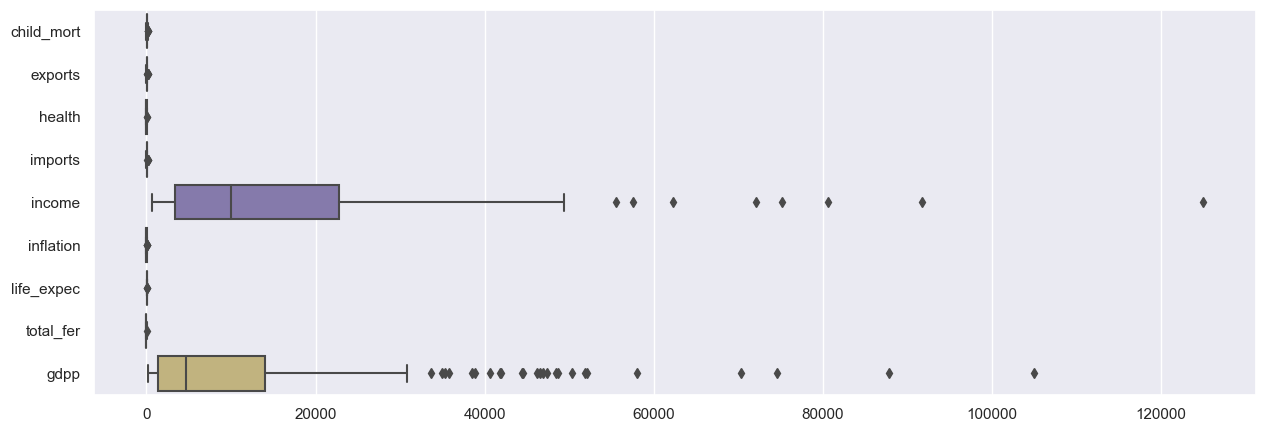

In [257]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dataset,orient='h')

outliers on right side in income is 
 23      80600
82      75200
91      91700
114     62300
123    125000
133     72100
145     55500
157     57600
Name: income, dtype: int64 



<AxesSubplot: >

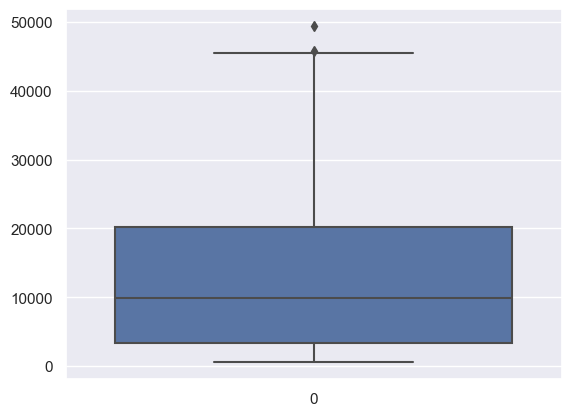

In [258]:
q1 = dataset.income.quantile(0.25)
q3 = dataset.income.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=dataset[dataset["income"]>upper_limit]
print("outliers on right side in income is \n",k1["income"],"\n")
dataset=dataset[dataset["income"]<upper_limit]
sns.boxplot(dataset["income"])

outliers on right side in gdpp is 
 7      51900
8      46900
29     47400
44     58000
53     46200
73     48700
110    50300
144    52100
159    48400
Name: gdpp, dtype: int64 



<AxesSubplot: >

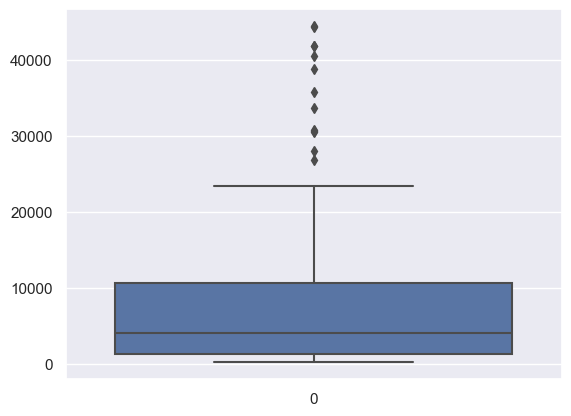

In [259]:
q1 = dataset.income.quantile(0.25)
q3 = dataset.income.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=dataset[dataset["gdpp"]>upper_limit]
print("outliers on right side in gdpp is \n",k1["gdpp"],"\n")
dataset=dataset[dataset["gdpp"]<upper_limit]
sns.boxplot(dataset["gdpp"])


<AxesSubplot: >

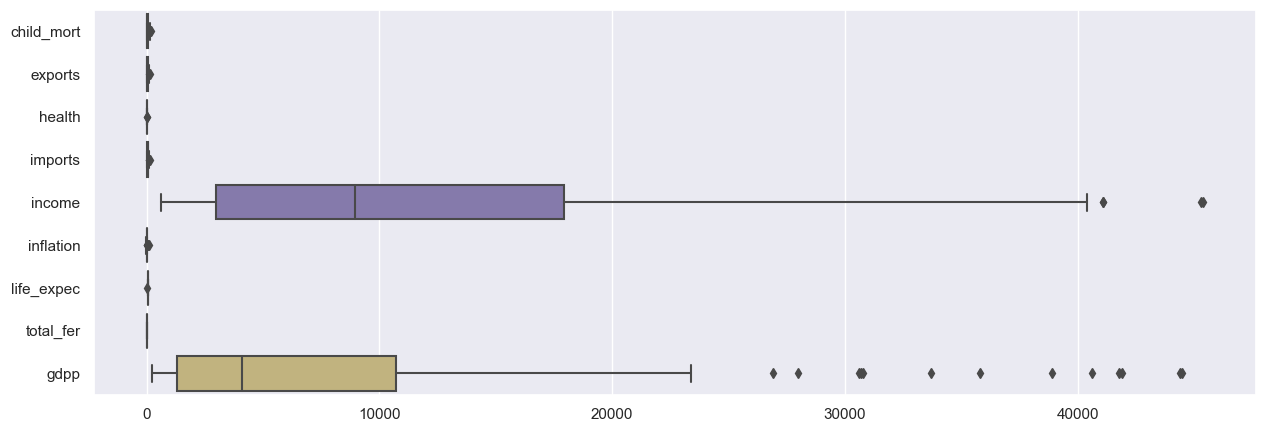

In [260]:
plt.figure(figsize=(15,5))
sns.boxplot(data=dataset,orient='h')

<AxesSubplot: >

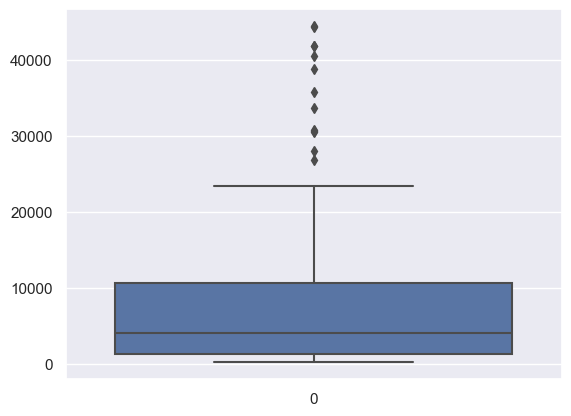

In [261]:
q1 = dataset.gdpp.quantile(0.25)
q3 = dataset.gdpp.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
k1=dataset[dataset["income"] > upper_limit]
data2=dataset[dataset["gdpp"] < upper_limit]
sns.boxplot(dataset["gdpp"])

<AxesSubplot: >

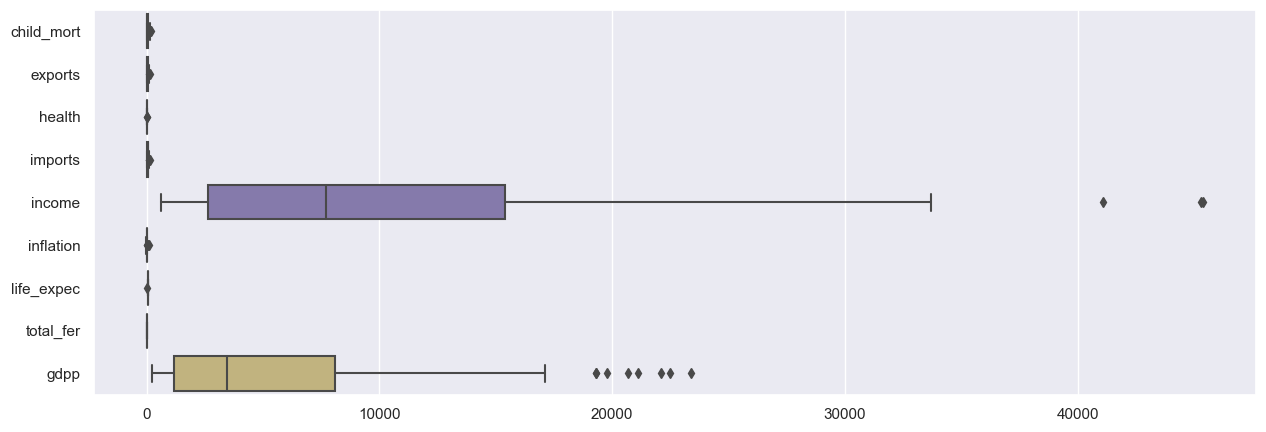

In [262]:
plt.figure(figsize=(15,5))
sns.boxplot(data=data2,orient='h')

In [263]:
#tamanho do dataset
data2.shape

(137, 10)

In [264]:
data2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


# Exploração dos dados

In [265]:
# Quantidade de paises 
data2.country.nunique(dropna = True)
#data2=data2.drop(['Cluster'],axis=1)
#occur = data2.groupby(['country']).size()
#occur

137

In [266]:
pd.set_option("display.float", "{:.2f}".format)
data2.describe()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,45.51,38.13,6.36,46.90,10257.39,8.88,68.42,3.20,5499.37
std,41.11,22.14,2.37,21.36,9371.18,11.21,8.37,1.56,5661.36
min,3.20,0.11,1.97,0.07,609.00,-4.21,32.10,1.23,231.00
25%,14.60,22.80,4.84,31.40,2660.00,2.61,62.20,1.92,1170.00
50%,28.10,32.90,5.89,44.90,7710.00,6.35,70.40,2.65,3450.00
75%,64.40,50.50,7.76,58.90,15400.00,12.10,74.70,4.56,8080.00
max,208.00,153.00,14.20,154.00,45400.00,104.00,80.40,7.49,23400.00


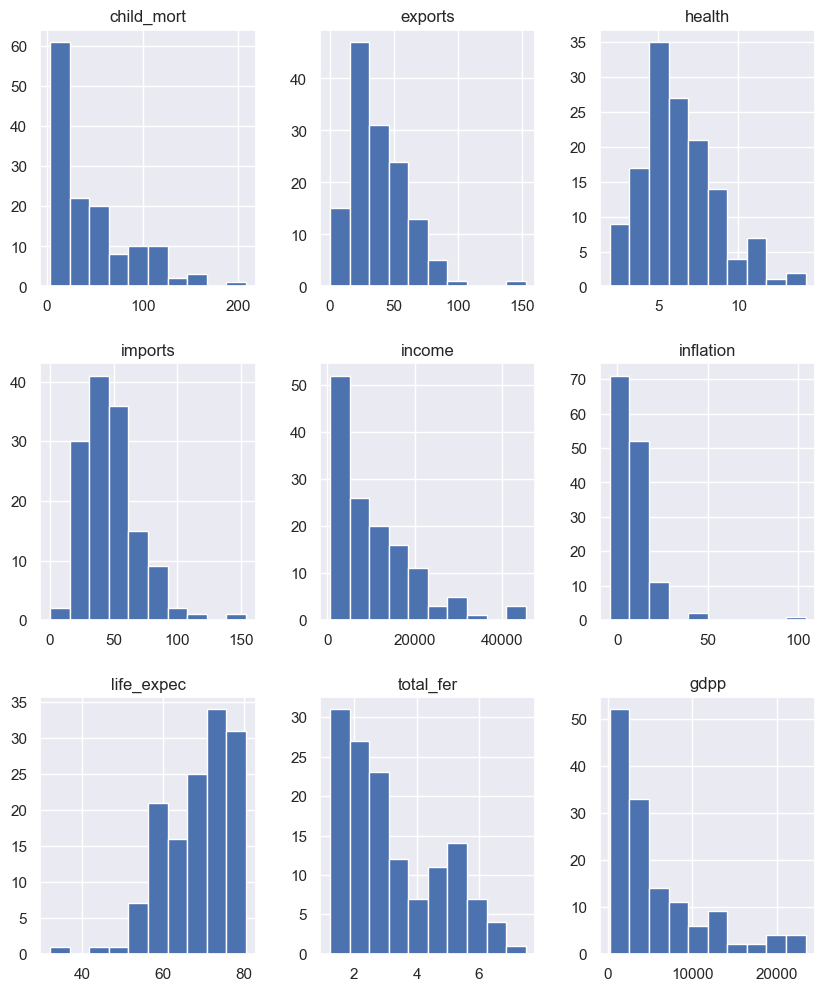

In [267]:
# variáveis que serão utilizadas 
p = data2.hist(figsize = (10,12))

In [269]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='inflation',
                    title='Paises com alta inflação'
                   )
fig.show()

In [270]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='child_mort',
                    title='Paises com indice alto por morte infantil'
                   )
fig.show()

## paises com cores mais claras, são paises com alta mortalidade infantil

In [121]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='life_expec',
                    title='Paises com alta expectativa de vida'
                   )
fig.show()

In [271]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='health',
                    title='Paises com Indice de saúde'
                   )
fig.show()

In [272]:
data2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310


In [273]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,137.00,45.51,41.11,3.20,14.60,28.10,64.40,208.00
exports,137.00,38.13,22.14,0.11,22.80,32.90,50.50,153.00
health,137.00,6.36,2.37,1.97,4.84,5.89,7.76,14.20
imports,137.00,46.90,21.36,0.07,31.40,44.90,58.90,154.00
income,137.00,10257.39,9371.18,609.00,2660.00,7710.00,15400.00,45400.00
inflation,137.00,8.88,11.21,-4.21,2.61,6.35,12.10,104.00
life_expec,137.00,68.42,8.37,32.10,62.20,70.40,74.70,80.40
total_fer,137.00,3.20,1.56,1.23,1.92,2.65,4.56,7.49
gdpp,137.00,5499.37,5661.36,231.00,1170.00,3450.00,8080.00,23400.00


C:\Users\BlueShift\AppData\Local\Temp\ipykernel_11088\2477129727.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



(9.5, -0.5)

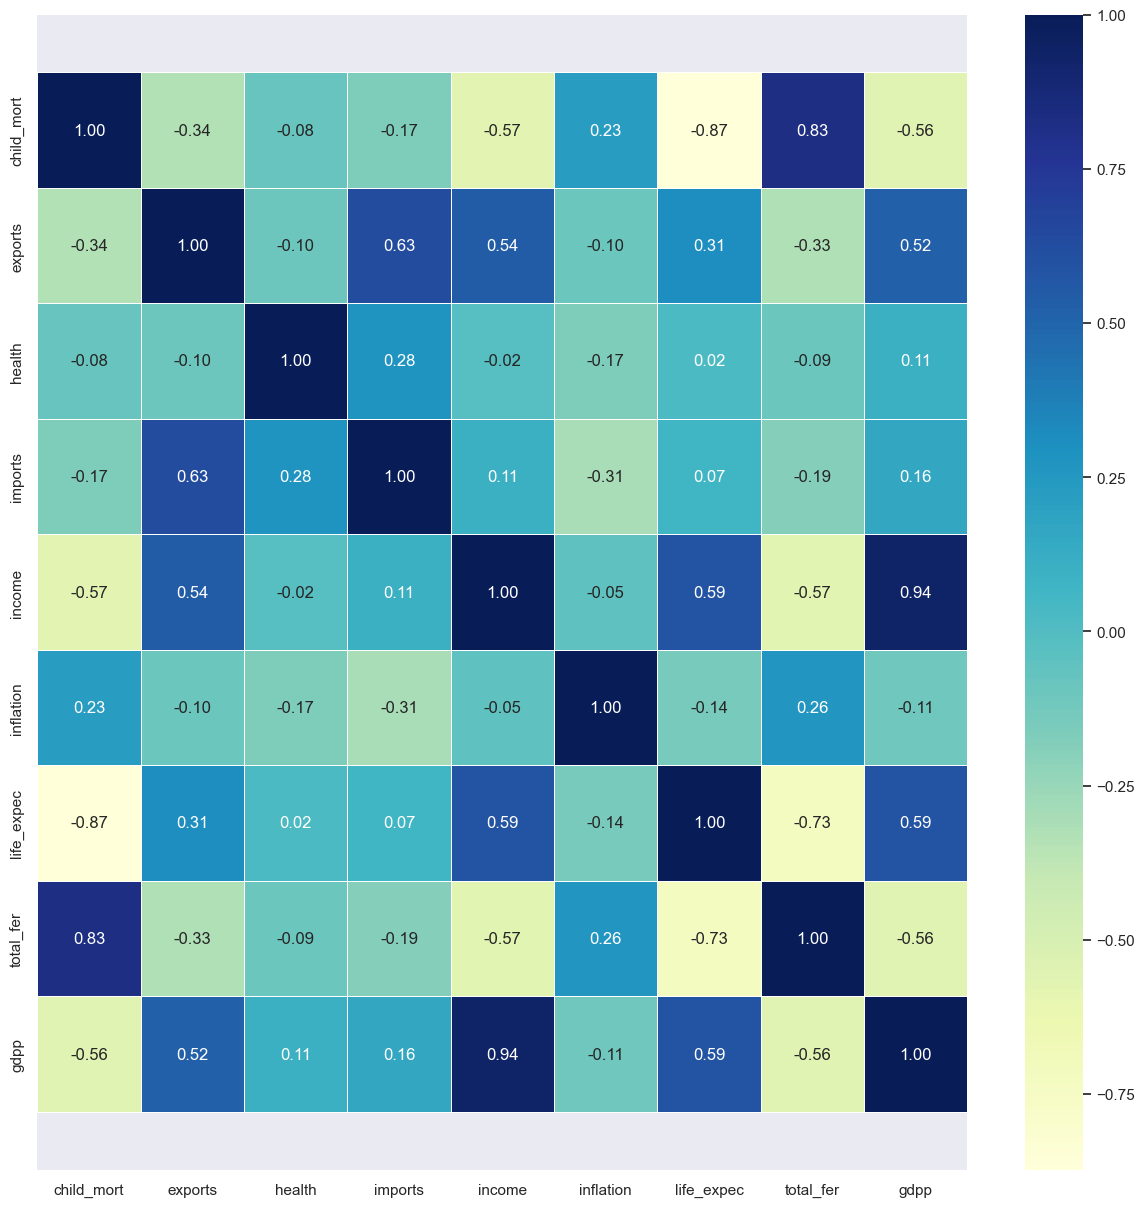

In [274]:
# Matriz de correlação

corr_matrix = data2.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Clusterização
* K-Médias
- Pré processamento

In [275]:
x=data2.drop(['country'],axis=1).values


### Normalização dos dados

In [276]:
#normalização
scaler = StandardScaler()
X = scaler.fit_transform(x)
x
'''
normalized_df = (x-x.mean())/x.std()
normalized_df'''


'\nnormalized_df = (x-x.mean())/x.std()\nnormalized_df'

In [277]:
#Quanto maior o valor de WCSS, o agrupamento será menos preciso.
#Quanto menor o valor de WCSSS, o agrupamento será mais preciso.
#kmeans.intertia_ tem o valor WCSS para o número atual de clusters.
#init = 'K-means++' é a inicialização do centroide para cada cluster. (Escolhendo o ponto de dados aleatório certo em cada cluster.)

Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=9)
    kmeans.fit(x)
    Wcss.append(kmeans.inertia_)
print(Wcss)

[16302714565.573353, 5271125573.8398, 2486196021.565976, 1500330532.5287132, 1008471886.0701281, 674744053.0271779, 546427395.4781845, 454192475.71572864, 400608402.4926262, 344858346.21710336]


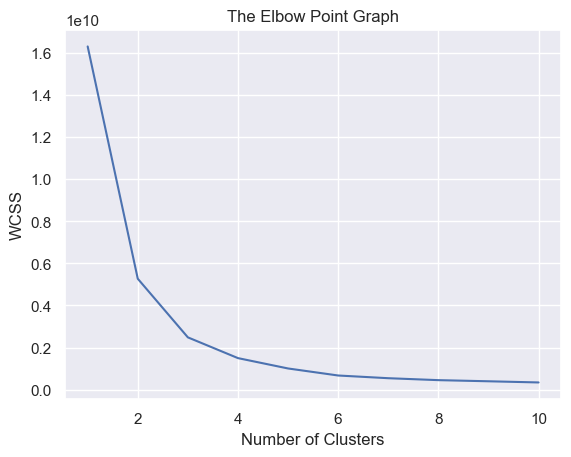

In [278]:
# Escolha do número de cluster
sns.set()
plt.plot(range(1,11),Wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Treinando o Modelo

In [279]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=9)
y=kmeans.fit_predict(x)
y

array([1, 1, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1,
       2, 2, 1, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1])

#### Visualizando os clusters

<Figure size 800x800 with 0 Axes>

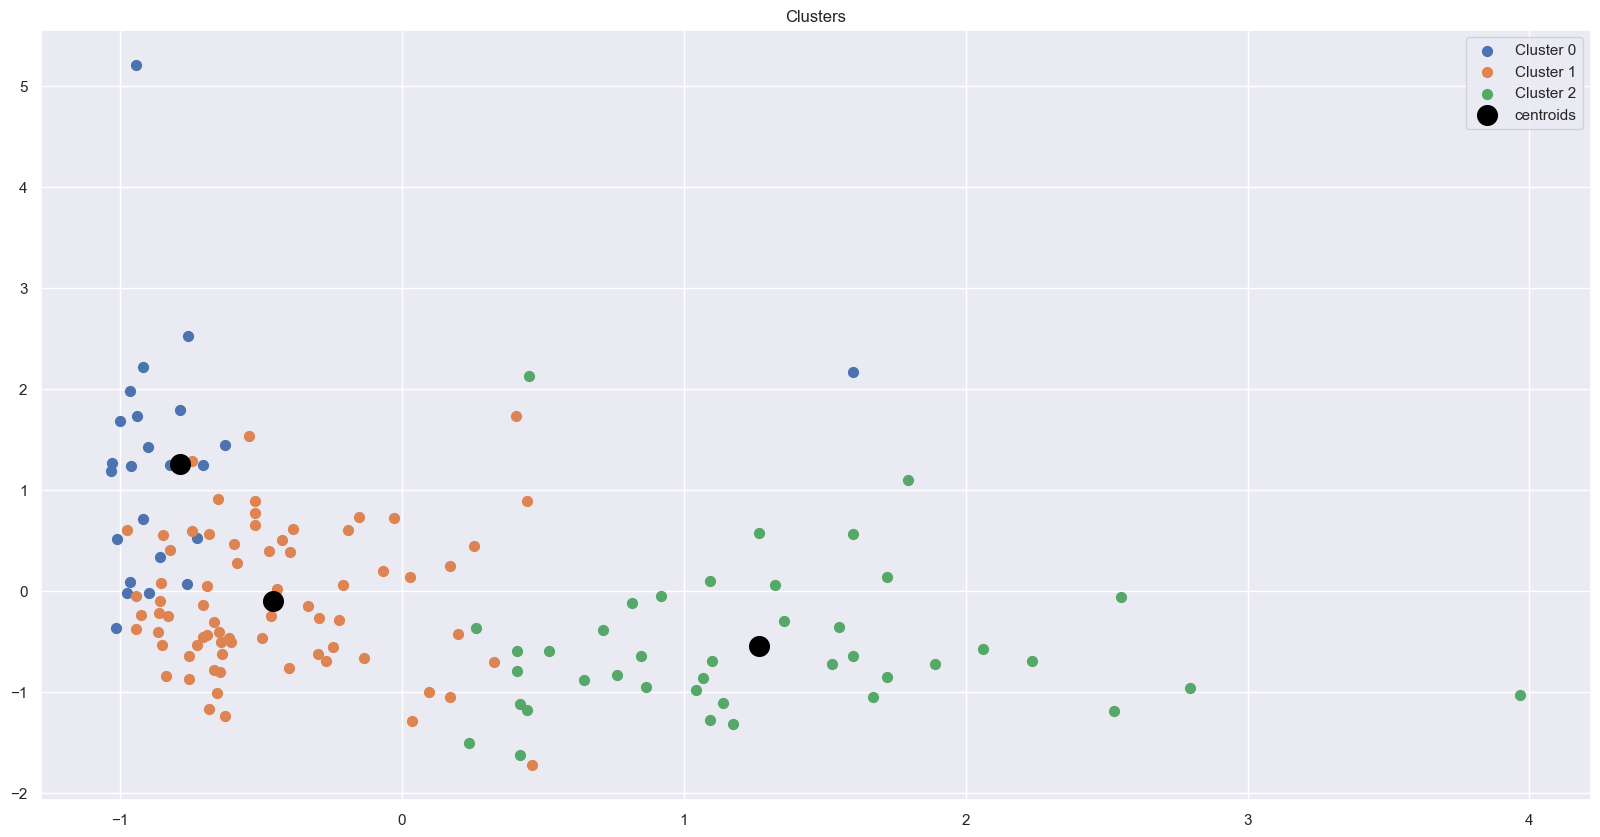

In [280]:

n_clusters = 3
plt.figure(figsize=(8,8))
for s in np.arange(1,2):
    kmeans=KMeans(n_clusters=3,init='k-means++',max_iter = 100, random_state=9)
    #model = KMeans(n_clusters=n_clusters, init="k-means++")
    pred = kmeans.fit_predict(X)
    plt.figure(figsize=(20,10))
    
    for i in range(0, n_clusters):
        plt.scatter(X[pred == i, 0], X[pred == i, 1], s=50, label="Cluster %d" % i)
   # plt.scatter(X[:,0],X[:,1], c=pred)
    plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 200, c = 'black', label='centroids')
    plt.title("Clusters")
    plt.legend()
plt.show()

In [281]:
data2['Cluster']=y
data2



C:\Users\BlueShift\AppData\Local\Temp\ipykernel_11088\498247848.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,1
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,1
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,1
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970,1
163,Venezuela,17.10,28.50,4.91,17.60,16500,45.90,75.40,2.47,13500,0
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310,1
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310,1


### Agrupando os 3 grupos de clusters

In [282]:
### Clusters 0,1 e 2
df_0=data2[data2['Cluster']==0]
df_1=data2[data2['Cluster']==1]
df_2=data2[data2['Cluster']==2]


In [283]:
#Países que representa seus clusters
import plotly.express as px
fig  = px.scatter(data2, x = 'Cluster', y = 'country')

fig.show()

In [284]:
#Cluster 2
df_2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
11,Bahrain,8.60,69.50,4.97,50.90,41100,7.44,76.00,2.16,20700,2
43,Czech Republic,3.40,66.00,7.88,62.90,28300,-1.43,77.50,1.51,19800,2
49,Equatorial Guinea,111.00,85.80,4.48,58.90,33700,24.90,60.90,5.21,17100,2
89,Libya,16.60,65.60,3.88,42.10,29600,14.20,76.10,2.41,12100,2
98,Malta,6.80,153.00,8.65,154.00,28300,3.83,80.30,1.36,21100,2
115,Oman,11.70,65.70,2.77,41.20,45300,15.60,76.10,2.90,19300,2
122,Portugal,3.90,29.90,11.00,37.40,27200,0.64,79.80,1.39,22500,2
128,Saudi Arabia,15.70,49.60,4.29,33.00,45400,17.20,75.10,2.96,19300,2
134,Slovak Republic,7.00,76.30,8.79,77.80,25200,0.48,75.50,1.43,16600,2
135,Slovenia,3.20,64.30,9.41,62.90,28700,-0.99,79.50,1.57,23400,2


In [285]:
#Cluster 1
df_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.20,10.00,7.58,44.90,1610,9.44,56.20,5.82,553,1
1,Albania,16.60,28.00,6.55,48.60,9930,4.49,76.30,1.65,4090,1
3,Angola,119.00,62.30,2.85,42.90,5900,22.40,60.10,6.16,3530,1
6,Armenia,18.10,20.80,4.40,45.30,6700,7.77,73.30,1.69,3220,1
12,Bangladesh,49.40,16.00,3.52,21.80,2440,7.14,70.40,2.33,758,1
...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.30,31.70,5.81,28.50,4240,16.50,68.80,2.34,1380,1
162,Vanuatu,29.20,46.60,5.25,52.70,2950,2.62,63.00,3.50,2970,1
164,Vietnam,23.30,72.00,6.84,80.20,4490,12.10,73.10,1.95,1310,1
165,Yemen,56.30,30.00,5.18,34.40,4480,23.60,67.50,4.67,1310,1


In [286]:
#Cluster 0
df_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
2,Algeria,27.30,38.40,4.17,31.40,12900,16.10,76.50,2.89,4460,0
4,Antigua and Barbuda,10.30,45.50,6.03,58.90,19100,1.44,76.80,2.13,12200,0
5,Argentina,14.50,18.90,8.10,16.00,18700,20.90,75.80,2.37,10300,0
9,Azerbaijan,39.20,54.30,5.88,20.70,16000,13.80,69.10,1.92,5840,0
13,Barbados,14.20,39.50,7.97,48.70,15300,0.32,76.70,1.78,16000,0
14,Belarus,5.50,51.40,5.61,64.50,16200,15.10,70.40,1.49,6030,0
21,Botswana,52.50,43.60,8.30,51.30,13300,8.92,57.10,2.88,6350,0
22,Brazil,19.80,10.70,9.01,11.80,14500,8.41,74.20,1.80,11200,0
24,Bulgaria,10.80,50.20,6.87,53.00,15300,1.11,73.90,1.57,6840,0
33,Chile,8.70,37.70,7.96,31.30,19400,8.96,79.10,1.88,12900,0


### Visualizando no mapa o agrupamento dos clusters

In [287]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    
                    title='Agrupamento dos Cluster',
                    
                    
                   )
fig.show()

# Interpretando cada um dos Clusters

In [288]:
data2.groupby('Cluster').mean()

C:\Users\BlueShift\AppData\Local\Temp\ipykernel_11088\1341286259.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,17.74,43.85,6.70,45.21,16157.62,7.27,73.39,2.07,8947.62
1,63.06,31.04,6.15,45.94,4326.70,9.84,64.93,3.89,1947.79
2,17.45,70.46,6.64,60.66,33018.18,7.73,76.08,2.19,19454.55


##### De acordo com a media dos clusteres , o grupo 0 tem baixa oferta total
##### o grupo 1 tem um bom GDP - valor de bens e serviços produzidos pela economia do país menos o valor dos bens e serviços usados na produção
##### O grupo 2 tem um bom indece de renda a media dos outros campos está relativamente melhor do que os outros 2 grupos

## Abaixo segue algumas ánalises de acordo com o clusters e algum índece de similaridade

### Cluster 2

In [289]:

fig = px.choropleth(df_2,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    
                    title='Cluster 2',
                    
                    
                   )
fig.show()


##  Agrupamento do cluster 2, são os países com alto indice de Renda
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='income',
                    
                    title='Indice de Renda para cluster 2 '
                    
                    
                   )
fig.show()

## Cluster 1

In [290]:
#Agrupamento do cluster 1, Indice de gdpp
fig = px.choropleth(df_1,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    
                    title='Cluster 1',
                    
                    
                   )
fig.show()

fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='gdpp',
                    
                    title='Indice de gdp para cluster 1  '
                    
                    
                   )
fig.show()
#GDP
#valor de bens e serviços produzidos pela economia do país menos o valor dos bens e serviços usados na produção

### Cluster 0

In [291]:
#Agrupamento do cluster 0, Indice de gdpp
fig = px.choropleth(df_0,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    
                    title='Cluster 0',
                    
                    
                   )
fig.show()

fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='child_mort',
                    
                    title='Indice de morte infantil para cluster 0 '
                    
                    
                   )
fig.show()

## Distribuição das dimensões em cada grupo

#### Cluster 0

In [292]:
pd.set_option("display.float", "{:.2f}".format)
df_0.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00,42.00
mean,17.74,43.85,6.70,45.21,16157.62,7.27,73.39,2.07,8947.62,0.00
std,13.77,20.00,1.78,21.26,3694.73,8.66,5.32,0.67,3068.03,0.00
min,4.50,10.70,3.40,11.80,9920.00,-4.21,54.30,1.25,4460.00,0.00
25%,9.02,28.75,5.60,28.02,13075.00,1.68,71.97,1.57,6395.00,0.00
50%,14.30,39.45,6.80,45.00,15950.00,4.68,74.50,1.92,8265.00,0.00
75%,19.77,53.40,7.97,60.65,19000.00,8.95,76.40,2.34,11275.00,0.00
max,63.70,93.80,10.90,108.00,23100.00,45.90,80.40,4.56,16000.00,0.00


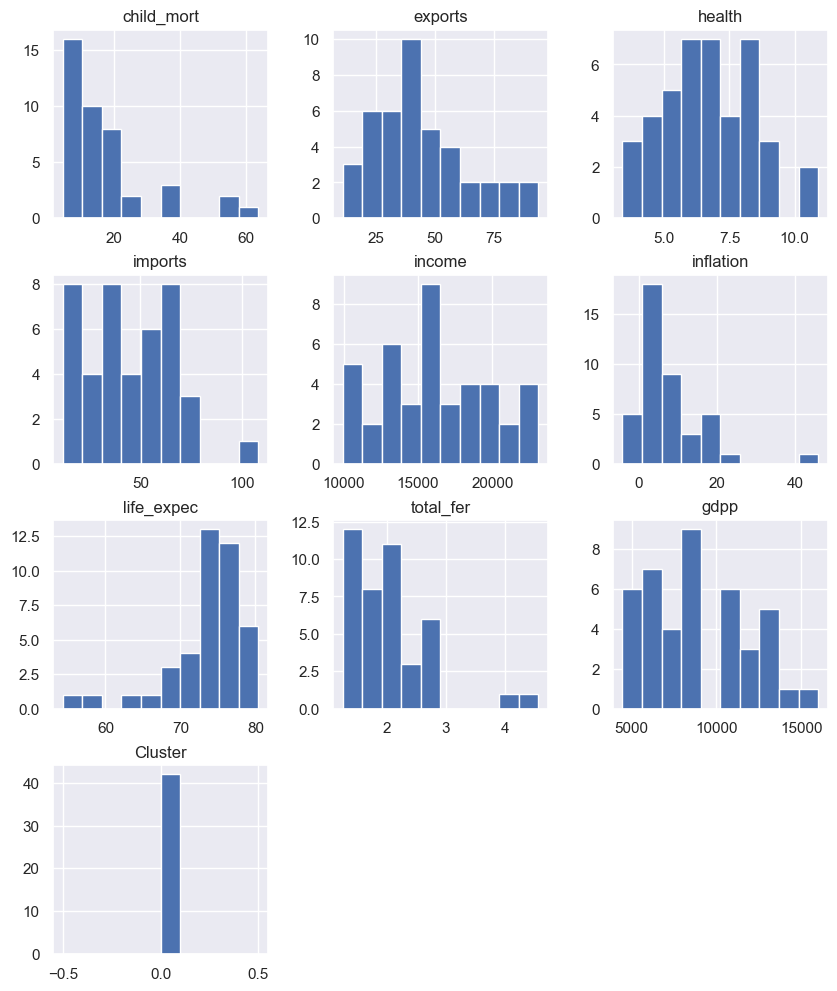

In [293]:
p = df_0.hist(figsize = (10,12))

### Custer 1

In [169]:
pd.set_option("display.float", "{:.2f}".format)
df_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00,84.00
mean,63.06,31.04,6.15,45.94,4326.70,9.84,64.93,3.89,1947.79,1.00
std,41.84,16.82,2.57,18.98,2949.02,12.53,8.04,1.52,1421.81,0.00
min,6.90,0.11,1.97,0.07,609.00,0.51,32.10,1.27,231.00,1.00
25%,26.40,19.50,4.73,32.02,1767.50,3.77,59.45,2.63,706.50,1.00
50%,57.55,27.85,5.34,44.00,3355.00,6.99,65.70,3.63,1330.00,1.00
75%,90.35,41.12,6.91,56.85,6702.50,12.10,71.15,5.13,3002.50,1.00
max,208.00,85.10,14.20,101.00,10400.00,104.00,77.90,7.49,5190.00,1.00


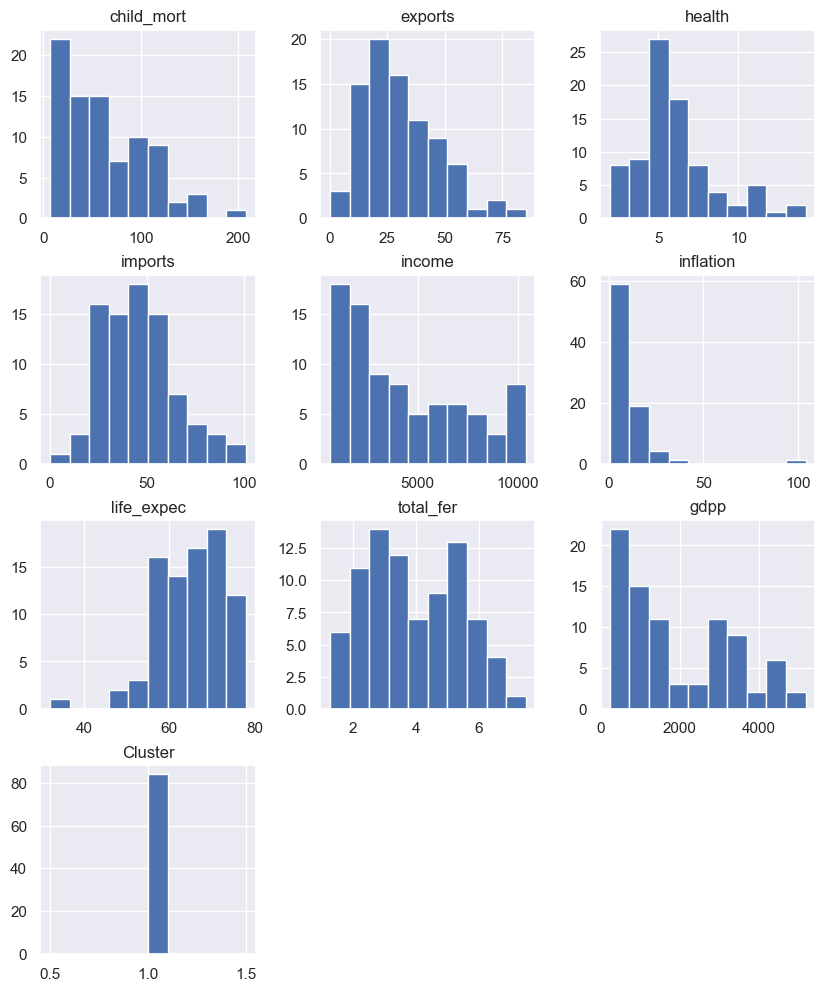

In [170]:
p = df_1.hist(figsize = (10,12))

### Custer 2

In [171]:
pd.set_option("display.float", "{:.2f}".format)
df_2.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
count,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00,11.00
mean,17.45,70.46,6.64,60.66,33018.18,7.73,76.08,2.19,19454.55,2.00
std,31.39,31.16,2.69,33.69,7393.35,8.87,5.42,1.18,3225.64,0.00
min,3.20,29.90,2.77,33.00,25200.00,-1.43,60.90,1.23,12100.00,2.00
25%,4.00,56.95,4.38,41.65,28300.00,0.56,75.75,1.41,18200.00,2.00
50%,7.00,65.70,6.93,50.90,29600.00,3.83,76.10,1.57,19800.00,2.00
75%,13.70,72.90,8.72,62.90,37400.00,14.90,79.65,2.66,21600.00,2.00
max,111.00,153.00,11.00,154.00,45400.00,24.90,80.30,5.21,23400.00,2.00


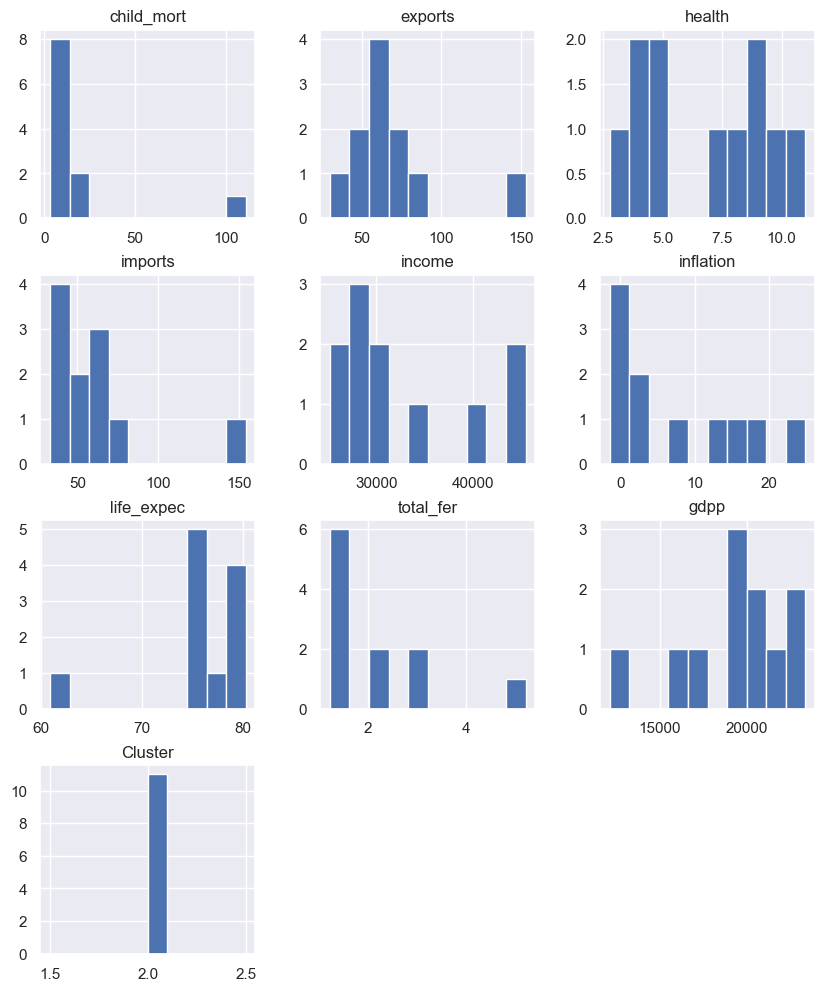

In [172]:
p = df_2.hist(figsize = (10,12))

# Clusterização Hierárquica

In [173]:
df = data2.set_index('country')

In [174]:
normalizedd_df = (df-df.mean())/df.std()
normalizedd_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
country,,,,,,,,,,
Afghanistan,1.09,-1.27,0.52,-0.09,-0.92,0.05,-1.46,1.69,-0.87,0.39
Albania,-0.70,-0.46,0.08,0.08,-0.03,-0.39,0.94,-0.99,-0.25,0.39
Algeria,-0.44,0.01,-0.92,-0.73,0.28,0.64,0.97,-0.20,-0.18,-1.33
Angola,1.79,1.09,-1.48,-0.19,-0.46,1.21,-0.99,1.90,-0.35,0.39
Antigua and Barbuda,-0.86,0.33,-0.14,0.56,0.94,-0.66,1.00,-0.69,1.18,-1.33
...,...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.40,0.38,-0.47,0.27,-0.78,-0.56,-0.65,0.19,-0.45,0.39
Venezuela,-0.69,-0.43,-0.61,-1.37,0.67,3.30,0.83,-0.47,1.41,-1.33
Vietnam,-0.54,1.53,0.20,1.56,-0.62,0.29,0.56,-0.80,-0.74,0.39


Text(0, 0.5, 'Euclidean Distance')

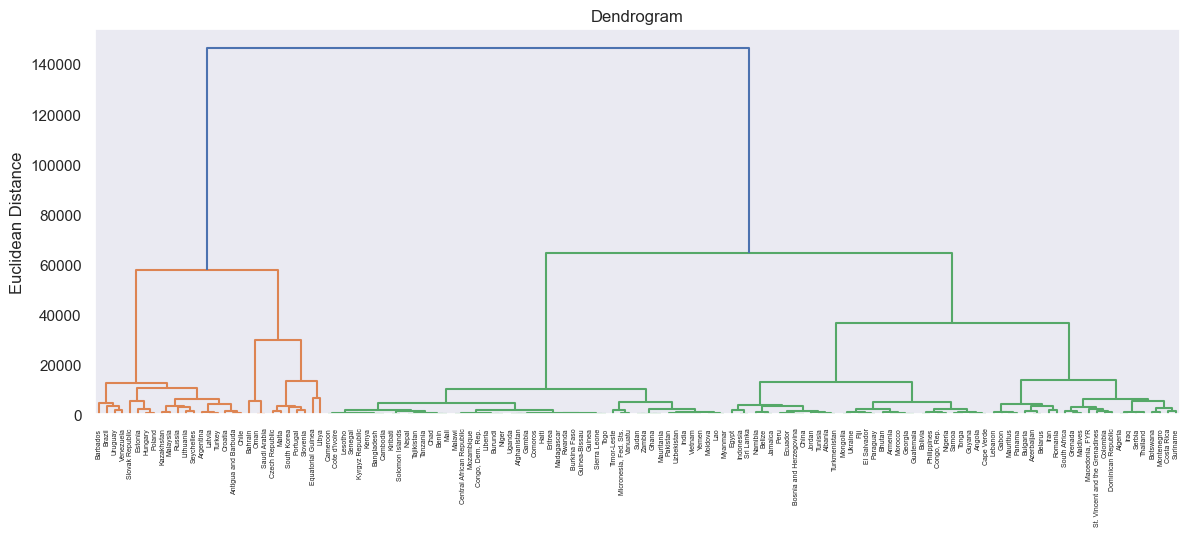

In [175]:

plt.figure(figsize=(14, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

* A decisão do número de clusters que melhor representem diferentes grupos podem ser escolhidos observando-se o dendrograma. A melhor escolha do número de clusters é o número de linhas verticais no dendrograma cortadas por uma linha horizontal que pode atravessar verticalmente a distância máxima sem intersectar um cluster,passando uma linha na altura do 60000 pode gerar 3 grandes grupos distintos separados pelo indice.

## Comparação entre clusterização hierarquica e Kmeas

In [176]:
fig = px.choropleth(data2,
                    locationmode='country names',
                    locations='country',
                    color='Cluster',
                    
                    title='Agrupamento dos Cluster Kmeas',
                    
                    
                   )
fig.show()

.
#### o kmeas foi agrupado pelos paises e similaride entre eles sendo necessario a definição do K  e clusterização hierarquica pelo index e utiliza uma medida  de quão próximo um registro está do outro e uma media de quão próximo o cluster está do outro.

### Algoritmo de K-médias até sua convergência.

  O agrupamento k-means, os dados são separados em k clusters, geralmente têm que está em forma de vetores númericos. O algoritmo
calcula a média de um conjunto de pontos de dados e a distância euclidiana entre eles.
*  Precisa definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).
*  Associar os centróides para cada cluster
* Associar cada objeto de dados a seu centróide mais próximo

 O agrupamento inicial é feito atrirbuindo cada dado, objeto ao centróide que está tão próximo a ele e a primeira iteração é 
concluida. O algoritmo funciona em iteraçoes até que os objetos não mudem seus centros de cluster. Os centróides movem suas posições até que os critérios de convergência sejam alcançados.

###   Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.

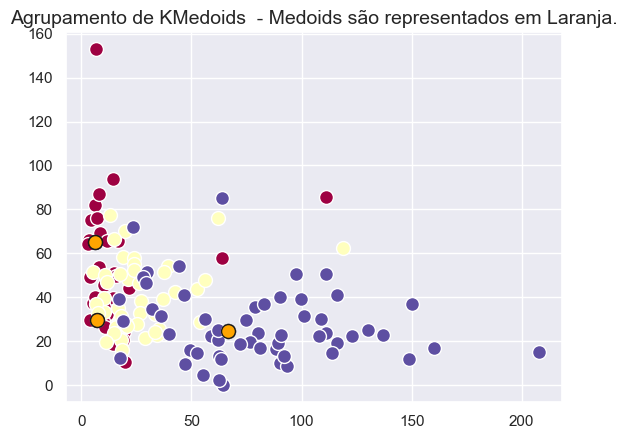

In [225]:
KMobj = KMedoids(n_clusters=3).fit(df)
labels = KMobj.labels_
unq_lab = set(labels)
colors_plot = [
 plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unq_lab))
]

for k, col in zip(unq_lab, colors_plot):
    class_member_mask = labels == k
    xy = df[class_member_mask].values
    plt.plot(
     xy[:, 0],
     xy[:, 1],
     'o',
     markerfacecolor=tuple(col),
     markeredgecolor='white',
     markersize=10,
     );
    plt.plot(
     KMobj.cluster_centers_[:, 0],
     KMobj.cluster_centers_[:, 1],
     'o',
     markerfacecolor='orange',
     markeredgecolor='k',
     markersize=10,
    );
    plt.title('Agrupamento de KMedoids  - Medoids são representados em Laranja.', fontsize=14);

 ### O algoritmo de K-médias é sensível a outliers nos dados. Explique.
 
 * Por que os outliers influencia no resultado da média 

### Por que o algoritmo de DBScan é mais robusto à presença de outliers?
* 
O  DBSCAN encontra clusters baseado na densidade de observações em determinada região, ou seja, quanto maior o aglomerado de observação juntas, mais provável que elas façam parte de um mesmo subgrupo. Dessa forma, todas as observações que estão separadas das demais podem ser consideradas Outliers.

